<a href="https://colab.research.google.com/github/sandeepbirudukota/Road-Accident-Prediction/blob/main/comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [44]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec21_updated.csv")
data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


#Preprocessing

In [45]:
X=data.copy()

In [46]:
# Cast Start_Time to datetime
X["Start_Time"] = pd.to_datetime(X["Start_Time"])

# Extract year, month, weekday and day
X["Year"] = X["Start_Time"].dt.year
X["Month"] = X["Start_Time"].dt.month
X["Weekday"] = X["Start_Time"].dt.weekday
X["Day"] = X["Start_Time"].dt.day

# Extract hour and minute
X["Hour"] = X["Start_Time"].dt.hour
X["Minute"] = X["Start_Time"].dt.minute

X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,Day,2016,2,0,8,7,53


In [47]:
X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,Day,2016,2,0,8,7,53


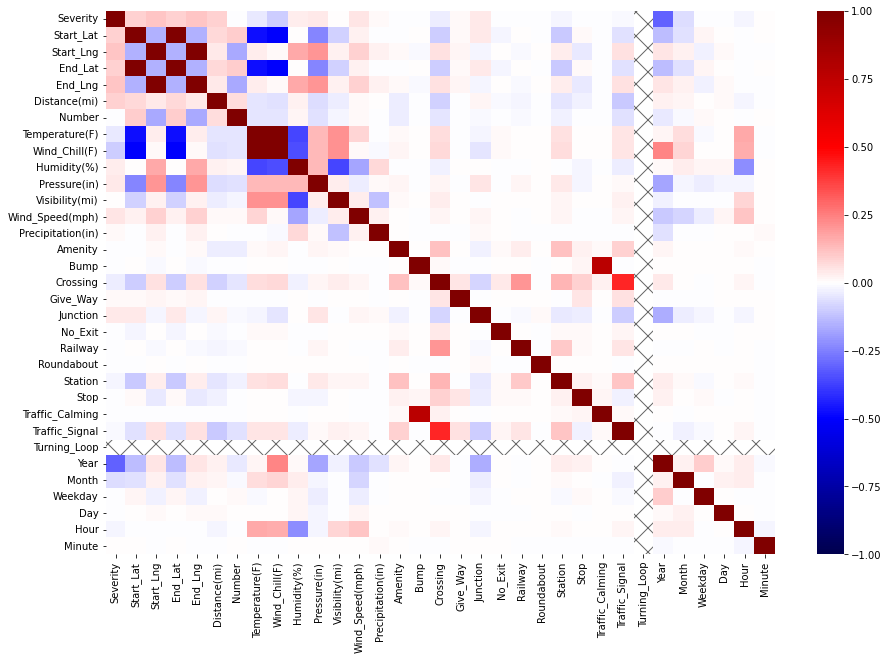

In [48]:
corr_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

start and end GPS coordinates of the accidents are highly correlated.

we can consider just one of them for the machine learning models.

wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.


So, we can drop

End_Lat and End_Lng

Wind Chill 

Turning_loop

We can also drop features

ID-  since they dont carry any information.

Start_Time: because it was decomposed by the time features added before (day, month, weekday)

End_Time: beause we can not know when traffic going to clear.

Description: most description only report the name of the road of the accident, so decided to omit the feature.

Number, Street, County, State, Zipcode, Country: there are lots of unique values for street. There are lot of null values for number. And moreover we just focus on the City where the accident happened

Timezone, Airport_Code, Weather_Timestamp: because they are irrelevant for our task.

Turning_Loop: since it's always False

Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

In [49]:
features_to_drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
X = X.drop(features_to_drop, axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,...,False,False,False,Night,2016,2,0,8,0,37
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,2016,2,0,8,5,56
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,...,False,False,False,Night,2016,2,0,8,6,15
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,...,False,False,False,Night,2016,2,0,8,6,51
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,...,False,False,False,Day,2016,2,0,8,7,53


In [50]:
X.shape

(2845342, 33)

Remove Duplicates

In [51]:
X.drop_duplicates(inplace=True)

In [52]:
X.shape

(2646365, 33)

In [53]:
X.nunique()

Severity                   4
Start_Lat            1093618
Start_Lng            1120365
Distance(mi)           14165
Side                       3
City                   11681
Temperature(F)           788
Humidity(%)              100
Pressure(in)            1068
Visibility(mi)            76
Wind_Direction            24
Wind_Speed(mph)          136
Precipitation(in)        230
Weather_Condition        127
Amenity                    2
Bump                       2
Crossing                   2
Give_Way                   2
Junction                   2
No_Exit                    2
Railway                    2
Roundabout                 2
Station                    2
Stop                       2
Traffic_Calming            2
Traffic_Signal             2
Civil_Twilight             2
Year                       6
Month                     12
Weekday                    7
Day                       31
Hour                      24
Minute                    60
dtype: int64

Errors

In [54]:
X["Side"].value_counts()

R    2204442
L     441922
N          1
Name: Side, dtype: int64

In [55]:
X = X[X["Side"] != "N"]
X["Side"].value_counts()

R    2204442
L     441922
Name: Side, dtype: int64

In [56]:
# pmean = X['Pressure(in)'].mean()
# tmean = X['Visibility(mi)'].mean()
# X['Pressure(in)']=X['Pressure(in)'].fillna(pmean)
# X['Visibility(mi)'] = X['Visibility(mi)'].fillna(tmean)

In [57]:
X["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [58]:
X.loc[X["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
X.loc[X["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
X.loc[X["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
X.loc[X["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
X.loc[X["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
X.loc[X["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
X.loc[X["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
X.loc[X["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
X.loc[X["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
X.loc[X["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
X.loc[X["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

np.nan is used to replace with null.

In [59]:
X["Weather_Condition"].unique()

array(['Rain', 'Cloudy', 'Snow', nan, 'Clear', 'Fog', 'Thunderstorm',
       'Smoke', 'Windy', 'Hail', 'Sand', 'Tornado'], dtype=object)

In [60]:
X["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [61]:
X.loc[X["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
X.loc[X["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
X.loc[X["Wind_Direction"] == "East", "Wind_Direction"] = "E"
X.loc[X["Wind_Direction"] == "North", "Wind_Direction"] = "N"
X.loc[X["Wind_Direction"] == "South", "Wind_Direction"] = "S"
X.loc[X["Wind_Direction"] == "West", "Wind_Direction"] = "W"

X["Wind_Direction"] = X["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

X["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

In [62]:
X.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                    134
Temperature(F)        64939
Humidity(%)           68508
Pressure(in)          55550
Visibility(mi)        66231
Wind_Direction        68769
Wind_Speed(mph)      152388
Precipitation(in)    538538
Weather_Condition     67356
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight         2655
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

In [63]:
missing_percent = X.isna().sum().sort_values(ascending = False)/len(X)
missing_percent

Precipitation(in)    0.203501
Wind_Speed(mph)      0.057584
Wind_Direction       0.025986
Humidity(%)          0.025888
Weather_Condition    0.025452
Visibility(mi)       0.025027
Temperature(F)       0.024539
Pressure(in)         0.020991
Civil_Twilight       0.001003
City                 0.000051
Year                 0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Severity             0.000000
Month                0.000000
Roundabout           0.000000
Weekday              0.000000
Day                  0.000000
Hour                 0.000000
Station              0.000000
Crossing             0.000000
Railway              0.000000
No_Exit              0.000000
Junction             0.000000
Give_Way             0.000000
Start_Lat            0.000000
Bump                 0.000000
Amenity              0.000000
Side                 0.000000
Distance(mi)         0.000000
Start_Lng            0.000000
Minute               0.000000
dtype: flo

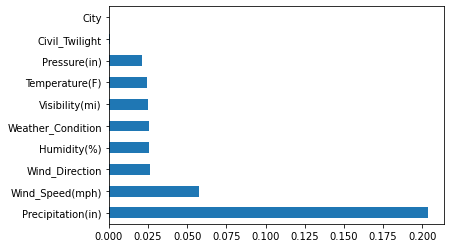

In [64]:
missing_percent[missing_percent != 0].plot(kind = 'barh')

we are going to fill the missing features with the mean for numerical data

In [65]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
X[features_to_fill] = X[features_to_fill].fillna(X[features_to_fill].mean())
X.isna().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
City                   134
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction       68769
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    67356
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Civil_Twilight        2655
Year                     0
Month                    0
Weekday                  0
Day                      0
Hour                     0
Minute                   0
dtype: int64

For categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [66]:
X.dropna(inplace=True)

In [67]:
X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [68]:
severity_counts = X["Severity"].value_counts()
severity_counts

2    2263455
3     148616
4     124168
1      24591
Name: Severity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


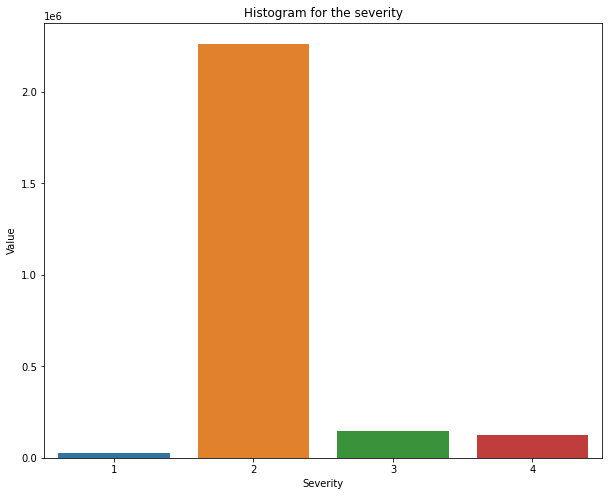

In [69]:
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

The number of accidents with the severity 1 is very small and the number of accidents with severity 2 is much higher. 

So, in order to balance the data we are going to undersample all the categories to the number of records of the minority category. We are going to undersample all categories equal to severity 1.

In [70]:
size = len(X[X["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = X[X["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
X = df

In [71]:
severity_counts = X["Severity"].value_counts()
severity_counts

1    24591
2    24591
3    24591
4    24591
Name: Severity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


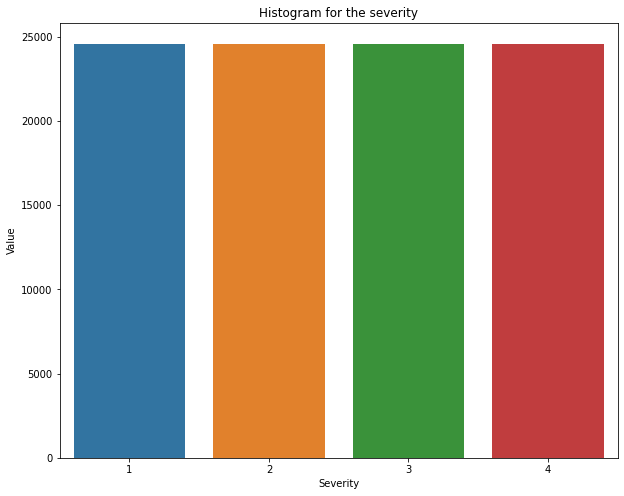

In [72]:
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [73]:
X.head(10)

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2077389,1,26.67856,-80.14511,0.000,R,West Palm Beach,81.0,88.0,30.05,3.0,...,False,False,True,Day,2020,5,3,28,7,51
2078194,1,46.10669,-123.20672,0.000,L,Clatskanie,68.0,50.0,29.99,10.0,...,False,False,False,Day,2020,5,3,28,9,16
2101751,1,35.21946,-80.82509,0.000,R,Charlotte,56.0,80.0,29.03,10.0,...,False,False,False,Day,2020,5,2,6,17,19
2281641,1,32.22886,-110.91397,0.000,L,Tucson,92.0,8.0,27.15,8.0,...,False,False,True,Day,2020,4,1,28,18,47
2080840,1,45.40813,-122.79508,0.000,R,Portland,86.0,35.0,29.62,10.0,...,False,False,True,Day,2020,5,4,29,17,14
2176183,1,42.75155,-73.92863,4.973,R,Schenectady,82.0,29.0,29.97,10.0,...,False,False,False,Day,2020,6,1,16,17,40
2098187,1,33.46569,-111.99560,0.000,L,Phoenix,98.0,11.0,28.63,10.0,...,False,False,True,Day,2020,5,5,2,17,8
2136689,1,37.38115,-77.46000,0.000,L,Chester,73.0,93.0,29.68,10.0,...,False,False,False,Day,2020,6,0,22,16,45
2159608,1,45.50483,-122.41470,0.000,R,Gresham,64.0,50.0,30.19,10.0,...,False,False,False,Day,2020,6,0,8,16,6
2103623,1,29.10141,-81.02663,6.846,R,Port Orange,61.0,60.0,30.01,10.0,...,False,False,False,Day,2020,5,3,7,7,36


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
X[features] = scaler.fit_transform(X[features])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2077389,1,0.086263,0.782952,0.0,R,West Palm Beach,0.821256,0.877551,0.905097,0.025000,...,False,False,True,Day,0.8,0.363636,0.500000,0.900000,0.304348,0.864407
2078194,1,0.881541,0.022785,0.0,L,Clatskanie,0.758454,0.489796,0.899824,0.083333,...,False,False,False,Day,0.8,0.363636,0.500000,0.900000,0.391304,0.271186
2101751,1,0.435880,0.770948,0.0,R,Charlotte,0.700483,0.795918,0.815466,0.083333,...,False,False,False,Day,0.8,0.363636,0.333333,0.166667,0.739130,0.322034
2281641,1,0.313461,0.239789,0.0,L,Tucson,0.874396,0.061224,0.650264,0.066667,...,False,False,True,Day,0.8,0.272727,0.166667,0.900000,0.782609,0.796610
2080840,1,0.852946,0.030051,0.0,R,Portland,0.845411,0.336735,0.867311,0.083333,...,False,False,True,Day,0.8,0.363636,0.666667,0.933333,0.739130,0.237288


encoding Categorial features

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98364 entries, 2077389 to 2468121
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           98364 non-null  int64  
 1   Start_Lat          98364 non-null  float64
 2   Start_Lng          98364 non-null  float64
 3   Distance(mi)       98364 non-null  float64
 4   Side               98364 non-null  object 
 5   City               98364 non-null  object 
 6   Temperature(F)     98364 non-null  float64
 7   Humidity(%)        98364 non-null  float64
 8   Pressure(in)       98364 non-null  float64
 9   Visibility(mi)     98364 non-null  float64
 10  Wind_Direction     98364 non-null  object 
 11  Wind_Speed(mph)    98364 non-null  float64
 12  Precipitation(in)  98364 non-null  float64
 13  Weather_Condition  98364 non-null  object 
 14  Amenity            98364 non-null  bool   
 15  Bump               98364 non-null  bool   
 16  Crossing      

In [76]:
categorical_features = ["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"]
X[categorical_features] = X[categorical_features].astype("category")
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98364 entries, 2077389 to 2468121
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Severity           98364 non-null  int64   
 1   Start_Lat          98364 non-null  float64 
 2   Start_Lng          98364 non-null  float64 
 3   Distance(mi)       98364 non-null  float64 
 4   Side               98364 non-null  category
 5   City               98364 non-null  category
 6   Temperature(F)     98364 non-null  float64 
 7   Humidity(%)        98364 non-null  float64 
 8   Pressure(in)       98364 non-null  float64 
 9   Visibility(mi)     98364 non-null  float64 
 10  Wind_Direction     98364 non-null  category
 11  Wind_Speed(mph)    98364 non-null  float64 
 12  Precipitation(in)  98364 non-null  float64 
 13  Weather_Condition  98364 non-null  category
 14  Amenity            98364 non-null  bool    
 15  Bump               98364 non-null  bool    
 

In [82]:
onehot_cols = ["Side", "Wind_Direction", "Weather_Condition", "Civil_Twilight"]

X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Civil_Twilight_Night
2077389,1,0.086263,0.782952,0.0,West Palm Beach,0.821256,0.877551,0.905097,0.025000,0.014837,...,0,0,0,1,0,0,0,0,0,0
2078194,1,0.881541,0.022785,0.0,Clatskanie,0.758454,0.489796,0.899824,0.083333,0.014837,...,0,0,0,0,0,0,0,0,0,0
2101751,1,0.435880,0.770948,0.0,Charlotte,0.700483,0.795918,0.815466,0.083333,0.021195,...,0,0,0,1,0,0,0,0,0,0
2281641,1,0.313461,0.239789,0.0,Tucson,0.874396,0.061224,0.650264,0.066667,0.021195,...,0,0,0,0,0,0,0,0,0,0
2080840,1,0.852946,0.030051,0.0,Portland,0.845411,0.336735,0.867311,0.083333,0.006359,...,0,0,0,0,0,0,0,0,0,0


encoding boolean values

In [77]:
X = X.replace([True, False], [1, 0])

In [88]:
X["City"].nunique()

6837

In [91]:
! pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


In [92]:
from sklearn.preprocessing import label_binarize
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(X["City"])
city_binary_enc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2077389,0,0,0,0,0,0,0,0,0,0,0,0,1
2078194,0,0,0,0,0,0,0,0,0,0,0,1,0
2101751,0,0,0,0,0,0,0,0,0,0,0,1,1
2281641,0,0,0,0,0,0,0,0,0,0,1,0,0
2080840,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205600,0,0,0,0,1,1,1,1,1,1,0,0,1
2796572,0,1,1,1,0,0,1,1,0,1,1,1,1
2668533,0,0,0,0,0,1,1,1,0,0,0,1,0
159039,1,0,0,0,1,1,0,0,0,0,0,0,0


In [93]:
df = pd.concat([X, city_binary_enc], axis=1).drop("City", axis=1)

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2077389,1,0.086263,0.782952,0.0,0.821256,0.877551,0.905097,0.025000,0.014837,0.010,...,0,0,0,0,0,0,0,0,0,1
2078194,1,0.881541,0.022785,0.0,0.758454,0.489796,0.899824,0.083333,0.014837,0.000,...,0,0,0,0,0,0,0,0,1,0
2101751,1,0.435880,0.770948,0.0,0.700483,0.795918,0.815466,0.083333,0.021195,0.012,...,0,0,0,0,0,0,0,0,1,1
2281641,1,0.313461,0.239789,0.0,0.874396,0.061224,0.650264,0.066667,0.021195,0.000,...,0,0,0,0,0,0,0,1,0,0
2080840,1,0.852946,0.030051,0.0,0.845411,0.336735,0.867311,0.083333,0.006359,0.000,...,0,0,0,0,0,0,0,1,0,1


In [97]:
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(df, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(78691, 61) (19673, 61)


In [133]:
accuracy = dict()

#Logistic Regression

In [134]:
sample = X
Y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, Y_sample, random_state=42)

In [135]:
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59018, 60) (59018,)
(19673, 60) (19673,)


In [136]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=42, n_jobs=-1)

logmodel.fit(X_train,y_train)


LogisticRegression(n_jobs=-1, random_state=42)

In [137]:
print("Train score:", logmodel.score(X_train, y_train))
print("Validation score:", logmodel.score(X_validate, y_validate))

Train score: 0.6368734962214917
Validation score: 0.634575306257307


In [138]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve
y_pred = logmodel.predict(X_validate)

accuracy["logistic regression"] = accuracy_score(y_validate, y_pred)

In [139]:
accuracy["logistic regression"]

0.634575306257307

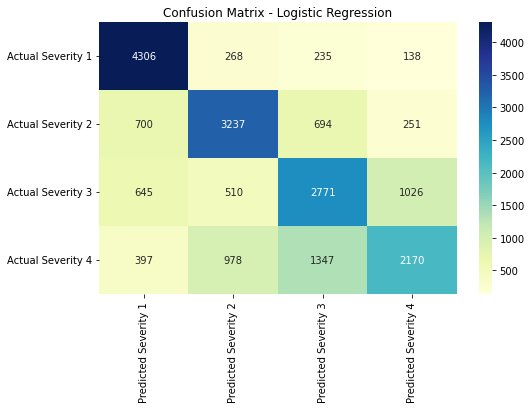

In [119]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


#Decision Tree

In [140]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59018, 60) (59018,)
(19673, 60) (19673,)


In [141]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [142]:
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Train score: 0.999881392117659
Validation score: 0.7005540588624003


In [143]:
y_pred = dtc.predict(X_validate)

accuracy["Decision tree"]= accuracy_score(y_validate, y_pred)

In [144]:
accuracy["Decision tree"]

0.7005540588624003

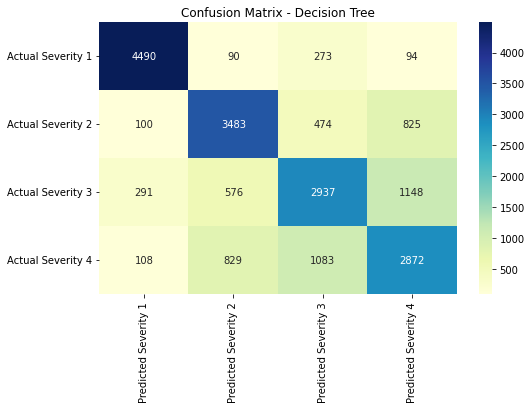

In [127]:
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#Random Forest

In [145]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59018, 60) (59018,)
(19673, 60) (19673,)


In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Train score: 0.999881392117659
Validation score: 0.7751740964774055


In [147]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)


In [148]:
accuracy["Random Forest"]

0.7751740964774055

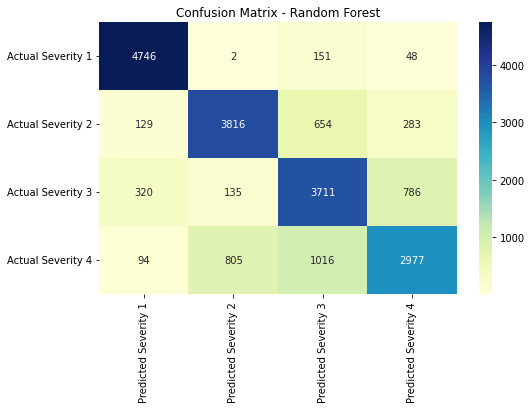

In [132]:
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Multi Layer Perceptron

In [150]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59018, 60) (59018,)
(19673, 60) (19673,)


In [151]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, verbose=False)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=42)

In [152]:
print("Train score:", mlp.score(X_train, y_train))
print("Validation score:", mlp.score(X_validate, y_validate))

Train score: 0.7737978243925582
Validation score: 0.728816143953642


In [153]:
y_pred = mlp.predict(X_validate)

accuracy["Multi Layer Perceptron"] = accuracy_score(y_validate, y_pred)


In [154]:
accuracy["Multi Layer Perceptron"]

0.728816143953642

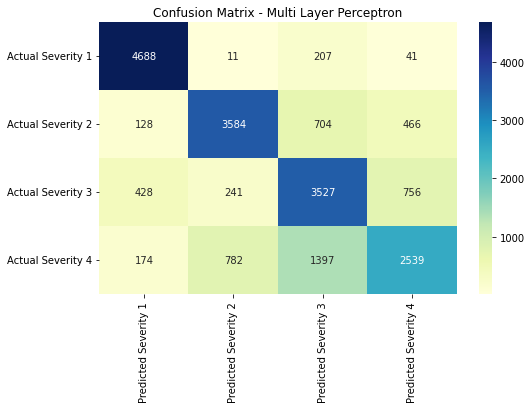

In [155]:
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multi Layer Perceptron")
plt.show()

#Results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


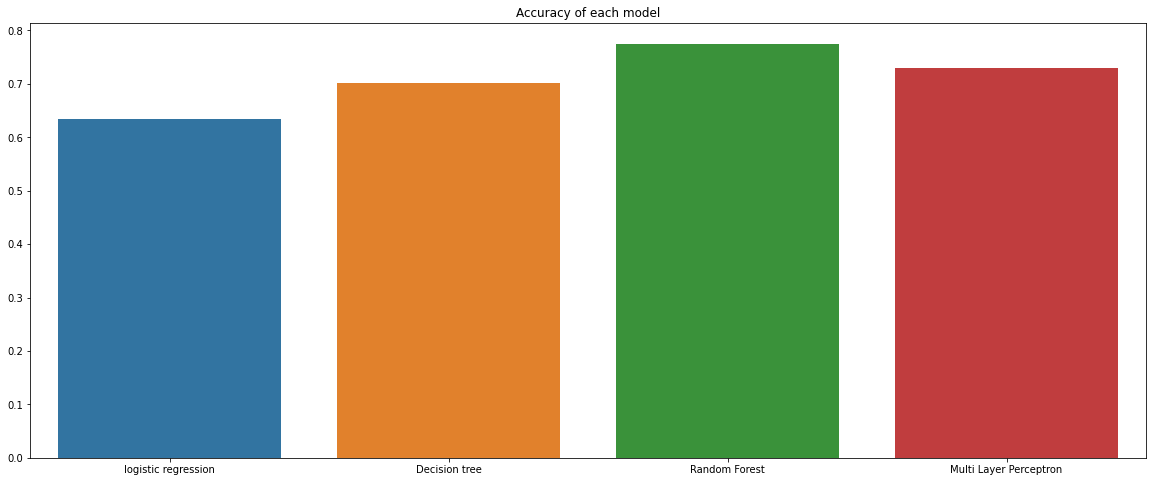

In [156]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy of each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()